In [1]:
import TMQGP as tm

In [2]:
import QuarkTM
from numpy import *
from scipy.integrate import quad

In [3]:
from scipy.misc import derivative

In [4]:
qrange = linspace(0, 5, 21)
erange = linspace(-5, 5, 101)

In [5]:
m = 0.5

In [49]:
pt = QuarkTM.Particle(m, qrange, erange, eps=5e-2)

In [50]:
Nc = 3
Nf = 3
Ns = 2

In [51]:
def Pfree(mu, T):
    UL = 5
    res =  quad(lambda z: z*z*T*log(1 + exp((-sqrt(m**2 + z**2) - mu)/T)) /2/pi**2, 0, UL)[0]
    res += quad(lambda z: z*z*T*log(1 + exp((-sqrt(m**2 + z**2) + mu)/T)) /2/pi**2, 0, UL)[0]
    return Nc*Nf*Ns*res

In [52]:
Trange = linspace(0.15, .5, 12)

In [53]:
ps0 = array([Pfree(0, T) for T in Trange])

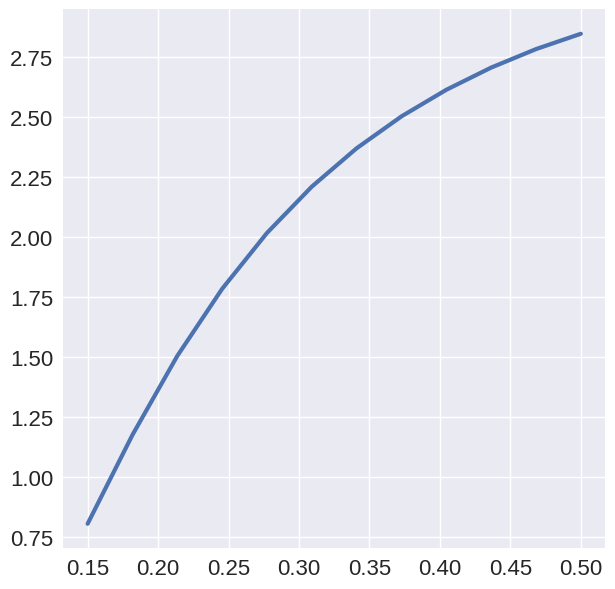

In [54]:
plt.plot(Trange, ps0/Trange**4)

In [55]:
chi2 = array([derivative(lambda z: Pfree(z, T)/T**2, 0, dx=1e-2, n=2) for T in Trange])

/tmp/ipykernel_326926/3126564020.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  chi2 = array([derivative(lambda z: Pfree(z, T)/T**2, 0, dx=1e-2, n=2) for T in Trange])


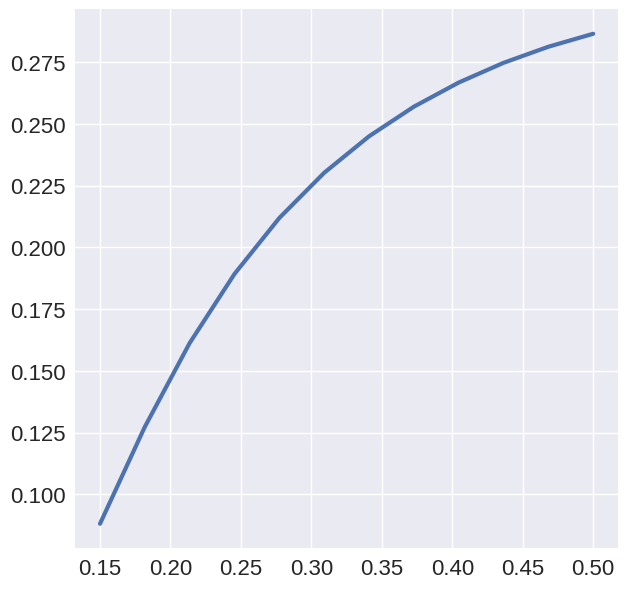

In [56]:
plt.plot(Trange, chi2/9)

Now numeric version

In [57]:
Earr = array([erange for q in qrange])
omArr = array([sqrt(pt.m**2 + qrange**2) for e in erange]).transpose()

In [58]:
ImS = array([pt.eps*erange/erange for q in qrange])
ReS = array([0*pt.eps*(1 + np.tanh(erange/0.001))/2 for q in qrange])

/tmp/ipykernel_326926/1650739579.py:1: RuntimeWarning: invalid value encountered in divide
  ImS = array([pt.eps*erange/erange for q in qrange])


In [59]:
def G(om, q, eps=5e-2):
    return 1./(om - sqrt(pt.m**2 + q**2) - 1j*eps)
    

In [60]:
Gtab = np.array([[G(om, q) for om in erange] for q in qrange])

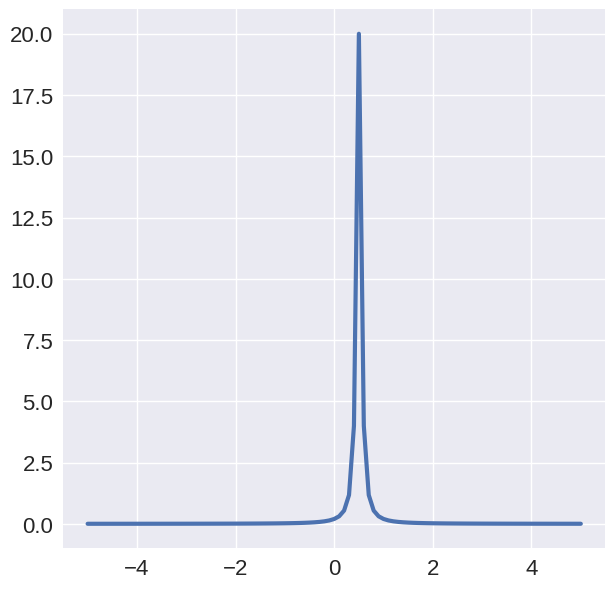

In [61]:
plt.plot(erange, imag(Gtab)[0, :])

In [62]:
Gtab = np.nan_to_num((1/(Earr - omArr - 1j*ImS + 0)).transpose())

/tmp/ipykernel_326926/1144203610.py:1: RuntimeWarning: invalid value encountered in divide
  Gtab = np.nan_to_num((1/(Earr - omArr - 1j*ImS + 0)).transpose())


In [63]:
plt.plot(erange, imag(Gtab[:, 30])

SyntaxError: incomplete input (1998446117.py, line 1)

In [64]:
def P(mu, T, eps=1e-3):
    # Earr = array([erange for q in qrange])
    # omArr = array([])
    # Gtab = np.array([[G(om, q, eps) for om in erange] for q in qrange])
    # Gtab = pt.Gtab
    res_Q = 0
    res_S = 0
    for _mu in [mu, -mu]:
        Gtab = np.array([[pt.G0(e, q, mu=_mu) for q in qrange] for e in erange])
        iImG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(Gtab)))
        iReG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(Gtab)))
    
        ImS = array([[pt.eps for q in qrange] for e in erange])
        ReS = array([0*pt.eps*(1 + np.tanh(erange/0.001))/2 for q in qrange]).transpose()
    
        iImS = tm.Interpolator2D(qrange, erange, ImS)
        iReS = tm.Interpolator2D(qrange, erange, ascontiguousarray(ReS))
    
        res_Q += tm.OmQ_F(T, iImG, iReG)
        res_S += tm.OmS_F(T, iImG, iReG, iImS, iReS)
    return res_Q, res_S

In [65]:
import tqdm

In [66]:
ps_out = array([P(0.1*T, T) for T in tqdm.tqdm(Trange)])

100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00, 10.70it/s]


In [67]:
ps0 = array([Pfree(0.1*T, T) for T in Trange])

In [68]:
ps_out

array([[ 0.05923518, -0.05920537],
       [ 0.05941466, -0.05933439],
       [ 0.05967469, -0.05948895],
       [ 0.06004392, -0.05966834],
       [ 0.06055593, -0.0598717 ],
       [ 0.06124894, -0.06009806],
       [ 0.06216541, -0.06034636],
       [ 0.06335157, -0.06061547],
       [ 0.06485665, -0.06090417],
       [ 0.06673169, -0.0612111 ],
       [ 0.06902804, -0.06153479],
       [ 0.07179633, -0.06187368]])

(0.0, 5.0)

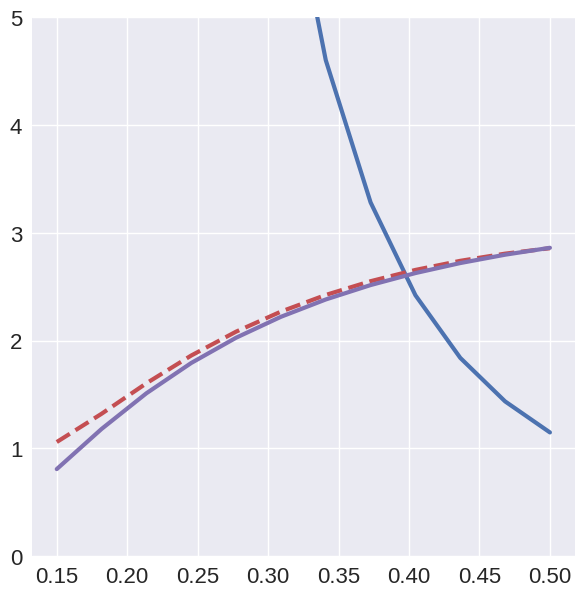

In [69]:
plt.plot(Trange, ps_out[:, 0]/Trange**4)
plt.plot(Trange, ps_out[:, 1]/Trange**4)
plt.plot(Trange, Nc*Nf*Ns*(ps_out[:, 1] + ps_out[:, 0])/Trange**4, ls='--')
plt.plot(Trange, ps0/Trange**4)
plt.ylim(0, 5)

In [70]:
chi2_num = array([derivative(lambda z: sum(P(z, T), axis=0)/T**2, 0, dx=1e-1, n=2) for T in tqdm.tqdm(Trange)])

  0%|                                                                                        | 0/12 [00:00<?, ?it/s]/tmp/ipykernel_326926/2050349039.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  chi2_num = array([derivative(lambda z: sum(P(z, T), axis=0)/T**2, 0, dx=1e-1, n=2) for T in tqdm.tqdm(Trange)])
100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.71it/s]


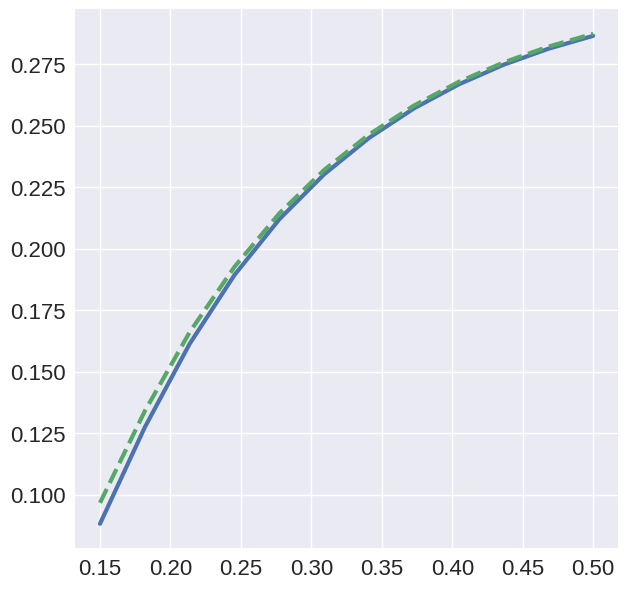

In [71]:
plt.plot(Trange, chi2/9)
plt.plot(Trange, Nc*Nf*Ns*chi2_num/9, ls='--')